<a href="https://colab.research.google.com/github/thopiyawan/topic-modeling-thai/blob/main/Copy_of_topic_modeling_th_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
!pwd

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [52]:
cd /content/drive/My Drive/SWU-Master-Thesis-63/Ploy/topicmodeling_thai

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [53]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/dc/16/7724205e25a8fdd2bc5ccb79c9240947f5cba9dc07e58c30e6df85fd82c0/astropy-4.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/05/49/76c0bed3272ba8f812eb41e95514083122a0358d13848be8198a6b394530/bokeh-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/6b/d9/6d88e8d32bb454c4ef8f50c62714b0eb20170f4c1d2cd316e0d99755405e/dm_tree-0.1.5-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/44/8a15e45ffa96e6cf82956dd8d7af9e666357e16b0d93b253903475ee947f/docutils-0.16-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a9/80/8cb5cc1b2648416cf899301f9404a9695259ad59036a61cd7ff8c03c91f8/earthengine-api-0.1.258.tar.gz
  Using cached https://files.pythonhosted.org/packages/66/89/479de0afbbfb98d1c4b887936808764627300208bb771fcd823403645a36/funcy-1.15-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/66/2

In [54]:
import time
start_time = time.time()

In [55]:
import requests
from bs4 import BeautifulSoup
from time import  time, sleep
from random import randint

# from googletrans import Translator

from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [56]:
dataset = pd.read_csv("dataset/QA_pregnancy.csv",encoding='utf8')
print(dataset.shape)
dataset.head()

(9987, 5)


question  ...                                             answer
0                                          ตั้งครรภ์  ...  เราได้รับคำถามของคุณแล้ว รอทีมแพทย์มาตอบคำถามส...
1                ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม  ...                                                NaN
2  ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...  ...                                                NaN
3  ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...  ...  วัคซีนพิษสุนัทบ้าและอิมมูโนโกลบูลินสามารถให้ใน...
4  ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...  ...  รบกวนขอข้อมูลเพพิ่มเติมด้วยครับ คุณแม่อายุเท่า...

[5 rows x 5 columns]

In [57]:
dataset.describe()

question  ...                                             answer
count                                                9987  ...                                               9529
unique                                               9891  ...                                               8995
top     รู้สึกเหมือนจะท้อง วัยเรียน ขอยาหยุดครรถ์ได้ที...  ...  สวัสดีค่ะ คำถามของคุณอาจกว้างเกินไป ทำให้คุณหม...
freq                                                    3  ...                                                195

[4 rows x 5 columns]

In [58]:
print(dataset.shape)
print("===============================================")
print(dataset.info())

(9987, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9987 non-null   object
 1   href      9987 non-null   object
 2   date_ask  9982 non-null   object
 3   user      9986 non-null   object
 4   answer    9529 non-null   object
dtypes: object(5)
memory usage: 390.2+ KB
None


In [59]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [60]:
try:
    %tensorflow_version 2.x
except:
    pass

In [61]:
#dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp

!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import pythainlp

pythainlp.__version__

'2.3.1'

In [64]:
dataset_q = dataset.iloc[0:50,0]

In [65]:
import re, string, unicodedata

In [66]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.spell import correct


stopwords = list(thai_stopwords())


In [67]:
# def preprocess_review(reviews): 
#     cleaned_words = []
#     for review in reviews:
#         review = re.sub("[^\u0E00-\u0E7Fa-zA-Z0-9' ]|^'|'$|''", "", str(review))
#         words = word_tokenize(review, engine="deepcut")
#         tokenized_words = [word for word in words if word not in stopwords]
#         # correct_word = correct(str(tokenized_words))
#         # lemmatized_word = lemmatize_word(tokenized_words)
#         cleaned_words.append(tokenized_words)
#     return cleaned_words


In [68]:
dataset = dataset[['question','user']]
dataset['index'] = dataset.index
dataset 

question  ... index
0                                             ตั้งครรภ์  ...     0
1                   ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม  ...     1
2     ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...  ...     2
3     ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...  ...     3
4     ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...  ...     4
...                                                 ...  ...   ...
9982  คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...  ...  9982
9983  ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...  ...  9983
9984                                   รับทำแท้งมั้ยค่ะ  ...  9984
9985  เดือนพคปจดมาช่วงต้นเดือนและกลางเดือน2รอบค่ะจำว...  ...  9985
9986  อายุ 29 เคยเป็นหูดหงอนไก่ได้ทำการรักษาแล้ว ต่อ...  ...  9986

[9987 rows x 3 columns]

In [69]:
dataset['question'].tail(20)

9967    คือหนูอายุ14ปีค่ะ แล้วประจำเดือนมา20 กว่าวันแล...
9968    สวัสดีค่ะ คือประจำหนูขาดมา36วันแล้วนับจากประจำ...
9969    มีเพศสัมพันธ์วันที่5พคหลั่งนอกทานยาคุมฉุกเฉินต...
9970    ผมมีเพศสัมพันธ์ กับคนที่ไม่รู้จัก แล้วผมมีอากา...
9971    เป็นอีสุกอีใสมีไข้นิดหน่อยแต่อ่อนเพลียตอนนี้เป...
9972    มีอะไรกันกีบเเฟน แต่ป้องกันคับ ใส่ถุง เเต่ถุงย...
9973    หมอค่ะ คือหนูกินยาคุมกำเนิดของซูซี่21เม็ดมาประ...
9974    คือมีอะไรกับเเฟนครับ เเล้วรีบไปซื้อยาคุม zarin...
9975    มีเพศสัมพันธ์กับแฟนวันที่7 มิย หลั่งนอก ทานยาค...
9976    สวัสดีครับคุณหมอพอดีผมมีเพศสัมพันธุ์กับแฟนวันท...
9977    ประจำเดือนไม่มา4เดือนแล้วค่ะ ซื้อที่ตรวจครรภ์ม...
9978    ถ้ากินยาคุมฉุกเฉินไปแล้ว ปจด ไม่มาแต่มาในเดือน...
9979    คือวันที่20 พฤษภาคมมีเพศสัมพันธุ์กับแฟนโดยสวมถ...
9980    สอบถามคุณหมอค่ะ ดิฉันอายุ 25 ปี เพิ่งขูดมดลูกไ...
9981    เมื่อวันที่ 22 เมยมีอะไรกับแฟนแล้วถุงยางรั่วตอ...
9982    คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...
9983    ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...
9984          

In [70]:
from sklearn import preprocessing

# doc_sample = dataset[dataset['index'] == 4310].values[0][0]
# print('original document: ')
# words = []
# for word in doc_sample.split(' '):
#       words.append(word)
# print(words)
# print('\n\n tokenized and lemmatized document: ')
# print(simple_preprocess(doc_sample))

In [71]:
!pip install pathos

In [72]:

import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel


cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(documents):
    # replace_word = ['เพศสัมพันธุ์','เพศสัมพัน','เพสสัมพัน']
    list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
    #list_words = []
    result = []
    for token in word_tokenize(documents, engine='newmm'): 
        token = token.strip()
        # token = correct(token)
        if token not in stopwords and len(token) >5 and token not in list_words:
            # token = correct(token)
            # token = token.replace('สัมพันธุ์','สัมพันธ์')
            # token = token.replace('สัมพัน','สัมพันธ์')
            # token = token.replace('สัมพันธ์ธ์','สัมพันธ์')
            # token = token.replace('เพส','สัมพันธ์')
            # token = correct(str(token))
            result.append(token)
    return result


def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    # documents = documents.loc[~documents['headline_text'].str.contains('img')]
    documents.headline_text.replace({r'[^ก-๙]':''}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents


In [73]:
dataset = dataset.iloc[:,:]
documents = dataset.copy()
documents = documents.rename(columns={'question':'headline_text'})

documents = documents.groupby('user')['headline_text'].agg(lambda col: ' '.join(col)).reset_index()
print(documents.shape[0])
documents.head()




8251


user                                      headline_text
0         \nHonestDocs User \n  ตั้งครรภ์35week่ท้องแข็งบ่อยมากจะมีอันตรายกับเ...
1  \nHonestDocs User 1000031\n  รบกวนสอบถามหน่อยค่ะ มีเพศสัมพันธ์ประมาณวันที่ ...
2  \nHonestDocs User 1000061\n  ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3  \nHonestDocs User 1000074\n  ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับ ปลอา...
4  \nHonestDocs User 1000159\n  สวัสดีค่ะคุณหมอ พอดีว่าปกติเป็นคนทานยาคุมพรีม2...

In [74]:
documents = parallelize(documents,cleanText)
documents.head()


user                                      headline_text
0         \nHonestDocs User \n  ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...
1  \nHonestDocs User 1000031\n  รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...
2  \nHonestDocs User 1000061\n  ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3  \nHonestDocs User 1000074\n  ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับปลอาย...
4  \nHonestDocs User 1000159\n  สวัสดีค่ะคุณหมอพอดีว่าปกติเป็นคนทานยาคุมพรีมเม...

In [75]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from pythainlp.tokenize import word_tokenize

allLen = documents.shape[0]
progress = 0


In [76]:
!pip install pytesseract

In [77]:
processed_docs = documents['headline_text'].map(preprocess)

In [78]:
# processed_docs = correctword(processed_docs)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
  result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word and word not in list_words]
  return " /".join(result)

def tokenize(d):
  result = d.split("/")
  result = list(filter(None, result))
  return result

new_text = []
for txt in documents["headline_text"]:
  new_text.append(cleanText(txt))

vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

word  count
1242     ประจำเดือน    4278
743       ตั้งครรภ์    1865
1562  มีเพศสัมพันธ์    1683
463          คุณหมอ    1100
538         ฉุกเฉิน     968
1241      ประจำเดือน    879
1568        มีโอกาส     809
864          ถุงยาง     803
1324        ป้องกัน     678
1567         มีโอกาส    668

In [80]:
new_text


['ตั้งครรภ์ /ท้องแข็ง /อันตราย /ตั้งครรภ์ /ท้องน้อย /อวัยวะเพศ /ตั้งครรภ์ /มีประโยชน์ /มีผลกระทบ /ตั้งครรภ์ /สาเหตุ /ตั้งครรภ์ /อันตราย /ตั้งครรภ์ /ตั้งครรภ์ /ออกกำลังกาย /ตั้งครรภ์ /คุกคาม /ล้างหน้า /ชาวบ้าน /ตั้งครรภ์ /ผิดปกติ /ตั้งครรภ์ /หัดเยอรมัน /ตั้งครรภ์ /คร้ำไม /ตั้งครรภ์ /ความผิดปกติ /โครโมโซม /ความเสี่ยง /เป็นโรค /น้ำคร่ำ /ตั้งครรภ์ /ปวดท้อง /ไม่เป็นอะไร /ปวดท้อง /ท้องแข็ง /เป็นอันตราย /ประจำเดือน /คุมกำเนิด /ตั้งครรภ์ /เวลานอน /เพราะอะไร /เป็นโรค /ตั้งครรภ์ /ผลกระทบ /ตั้งครรภ์ /หน่ววๆ /อวัยวะเพศ /อยากรู้ /ผู้หญิง /ตั้งครรภ์ /ใหมคร๊ /ตั้งครรภ์ /คุมกำเนิด /ตั้งครรภ์ /ตอนที่ /ตั้งครรภ์ /สุขภาพ /มีผลกระทบ /หรือว่า /เกิดขึ้น /ตั้งครรภ์ /เกิดขึ้น /ตั้งครรภ์ /ขนอ่อน /โดยเฉพาะ /หน้าท้อง /ตั้งครรภ์ /เวลานอน /นอนตะแคง /ตั้งครรภ์ /น้ำหนัก /น้ำหนัก /ผิดปกติ /เป็นโรค /ตั้งครรภ์ /มีสิทธิ์ /เป็นโรค /ตั้งครรภ์ /เวลานอน /อยากรู้ /เพราะอะไร /ตั้งครรภ์ /รับประทาน /ประเภท /แข็งแรง /ผู้หญิง /ตั้งครรภ์ /คุณแม่ /ตั้งครรภ์ /ยาระบาย /ท้องผูก /คุณแม่ /คาเฟอีน /ที่อยู่ /ตั้งครรภ์ /ตั้งครรภ์ /มีผลต่อ 

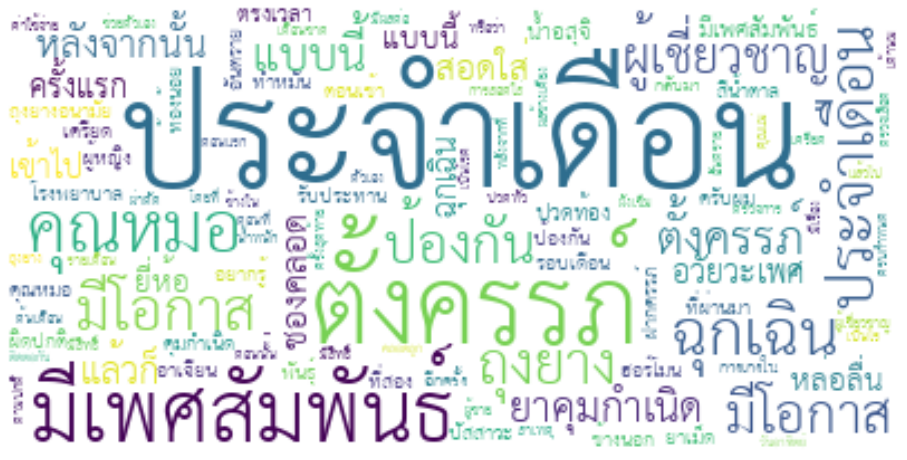

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_dict = {}
for i in range(0,len(keyword_df2)):
   word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [82]:
processed_docs

0       [ตั้งครรภ์, ท้องแข็ง, อันตราย, ตั้งครรภ์, ท้อง...
1       [มีเพศสัมพันธ์, การป้องกัน, เดือนขาด, ประจำเดือน]
2       [ช่วยตัวเอง, น้ำอสุจิ, ผู้หญิง, เป็นไร, ข้างนอ...
3                                     [ทำแท้ง, ผิดกฎหมาย]
4       [คุณหมอ, มาโดยตลอด, ประจำเดือน, คุณหมอ, หรือว่...
                              ...                        
4118                [เข้าเดือน, ป้องกัน, หน้าอก, น้ำหนัก]
4119                           [ครั้งสุดท้าย, ประจำเดือน]
4120                                         [ประจำเดือน]
4121    [ฝากครรภ์, รังสิต, ตั้งครรภ์, ตอบสนอง, ค่าใช้จ...
4122               [ทำหมัน, โรงพยาบาล, ชลบุรี, สิทธิบัตร]
Name: headline_text, Length: 8248, dtype: object

In [83]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 กรรมพันธุ์
1 กระดูก
2 กระตุก
3 กระเพาะ
4 กลับบ้าน
5 กลับมา
6 กลับหัว
7 กลางคืน
8 กลางดึก
9 กลางปี
10 กลายเป็น


In [84]:
dictionary

In [85]:
from gensim import corpora, models

In [86]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)

# Dictionary for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[4310])

# Applying TF-IDF
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

# Train corpus with LDA
# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=7, id2word=dictionary,
#                                        passes=2, workers=31)

# lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
#                                        id2word=dictionary,
#                                        num_topics=10, 
#                                        random_state=100,
#                                        chunksize=100,
#                                        passes=10,
#                                        per_word_topics=True)
a = 0.01
b = 0.31
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=4, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha=a,
                                       eta=b)


# for idx, topic in lda_model.print_topics(-1):
#     print('Train corpus with LDA \n'+'Topic: {} \nWords: {}'.format(idx, topic))

# LDA with TF-IDF
# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary,
#                                              passes=2, workers=31)
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('LDA with TF-IDF \n'+'Topic: {} Word: {}'.format(idx, topic))

# # Performance evaluation of LDA with Bag of Words
# for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
#     print('Performance evaluation of LDA with Bag of Words \n'+"\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

# # Performance Evaluation of LDA with TF-IDF
# for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
#     print('Performance Evaluation of LDA with TF-IDF \n'+"\nScore: {} \t \nTopic: {}".format(score,lda_model_tfidf.print_topic(index, 10)))

# # Testing
# unseen_document = 'ตั้งครรภ์5เดือนแล้วคะมีตกขาวสีน้ำตาลขุ่นบ้างทีก็แดงเข้มแห้งๆไม่มีกลิ่นไม่มีอาการผิดปกติอยากทราบว่าอันตรายไหมค้ะเกิดจากสาเหตุอะไระ'
# print(unseen_document)
# bow_vector = dictionary.doc2bow(preprocess(unseen_document))
# for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

[(16, 1), (23, 1), (43, 1)]
[(0, 0.008916975486313261),
 (1, 0.006441760553738302),
 (2, 0.01721770523080168),
 (3, 0.008786062758110912),
 (4, 0.0069559385147159045),
 (5, 0.015303954927383616),
 (6, 0.016352042687291818),
 (7, 0.025202996709544807),
 (8, 0.009493205427245995),
 (9, 0.008916975486313261),
 (10, 0.0830693407184826),
 (11, 0.016352042687291818),
 (12, 0.00813479829230471),
 (13, 0.021038161864494125),
 (14, 0.006198563502333313),
 (15, 0.015033815306909773),
 (16, 0.08015735220766015),
 (17, 0.008986967048031745),
 (18, 0.015486380143781953),
 (19, 0.01860978312875349),
 (20, 0.058482870401088356),
 (21, 0.008850095709060172),
 (22, 0.038259887318459036),
 (23, 0.06723946408887675),
 (24, 0.35400382836240685),
 (25, 0.028566614513899965),
 (26, 0.032222373230871904),
 (27, 0.009304891564376744),
 (28, 0.029237037632801777),
 (29, 0.008400998903181602),
 (30, 0.029707691233563475),
 (31, 0.01721770523080168),
 (32, 0.018275094681286342),
 (33, 0.009396104172575913),
 (34

In [87]:
dictionary

In [88]:
id_words = [[(dictionary[id], count) for id, count in line] for line in bow_corpus]
print(id_words)

[[('กลับบ้าน', 1), ('กลับมา', 1), ('กลางคืน', 2), ('กังวลใจ', 1), ('กางเกงใน', 1), ('การคุมกำเนิด', 2), ('การป้องกัน', 2), ('การรักษา', 3), ('กำเนิด', 1), ('กินข้าว', 1), ('ก่อนกำหนด', 10), ('ก่อนที่จะ', 2), ('ข้อมูล', 1), ('ครบกำหนด', 3), ('ครับผม', 1), ('ครั้งแรก', 3), ('คลอดลูก', 11), ('คลีนิค', 1), ('คลื่นไส้', 2), ('ความผิดปกติ', 2), ('ความเสี่ยง', 8), ('คำปรึกษา', 1), ('คำแนะนำ', 5), ('คุณหมอ', 21), ('คุณแม่', 40), ('คุมกำเนิด', 5), ('จำเป็นต้อง', 4), ('ฉีกขาด', 1), ('ฉุกเฉิน', 9), ('ช่วงเวลา', 1), ('ช่องคลอด', 6), ('ซิฟิลิส', 2), ('ดีกว่า', 2), ('ดีแล้ว', 1), ('ตรวจการ', 2), ('ตรวจหา', 1), ('ตรวจเลือด', 7), ('ตอนกลางคืน', 5), ('ตอนที่', 3), ('ตอนนั้น', 1), ('ตอนเช้า', 3), ('ตอนแรก', 2), ('ตัวเอง', 2), ('ตั้งครรภ์', 216), ('ตั้งท้อง', 13), ('ตั้งใจ', 1), ('ติดกัน', 1), ('ติดต่อกัน', 1), ('ติดเชื้อ', 3), ('ต่างจังหวัด', 1), ('ถึงกำหนด', 2), ('ถุงยางอนามัย', 2), ('ถูกวิธี', 1), ('ทั้งคู่', 3), ('ทั้งวัน', 2), ('ทั้งสอง', 1), ('ทารกในครรภ์', 5), ('ทำหมัน', 5), ('ทำให้เกิด', 1), ('ที

In [89]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 3),
  (8, 1),
  (9, 1),
  (10, 10),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 3),
  (16, 11),
  (17, 1),
  (18, 2),
  (19, 2),
  (20, 8),
  (21, 1),
  (22, 5),
  (23, 21),
  (24, 40),
  (25, 5),
  (26, 4),
  (27, 1),
  (28, 9),
  (29, 1),
  (30, 6),
  (31, 2),
  (32, 2),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 7),
  (37, 5),
  (38, 3),
  (39, 1),
  (40, 3),
  (41, 2),
  (42, 2),
  (43, 216),
  (44, 13),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 3),
  (54, 2),
  (55, 1),
  (56, 5),
  (57, 5),
  (58, 1),
  (59, 6),
  (60, 2),
  (61, 12),
  (62, 2),
  (63, 2),
  (64, 14),
  (65, 4),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 7),
  (71, 7),
  (72, 20),
  (73, 72),
  (74, 4),
  (75, 16),
  (76, 9),
  (77, 22),
  (78, 6),
  (79, 7),
  (80, 4),
  (81, 29),
  (82, 13),
  (83, 10),
  (84, 8),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (9

In [90]:
print('Train corpus with LDA')
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

# print('LDA with TF-IDF')
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('Topic: {} Word: {}\n'.format(idx, topic))

# print('Performance evaluation of LDA with Bag of Words')
# Performance evaluation of LDA with Bag of Words
# for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
#     print("Score: {}\t \nTopic: {}\n".format(score, lda_model.print_topic(index, 10)))

# from pprint import pprint
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[bow_corpus]

# print('Performance Evaluation of LDA with TF-IDF')
# # Performance Evaluation of LDA with TF-IDF
# for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
#     print("Score: {} \t \nTopic: {}\n".format(score,lda_model_tfidf.print_topic(index, 10)))

# # Testing
# unseen_document = 'ตั้งครรภ์5เดือนแล้วคะมีตกขาวสีน้ำตาลขุ่นบ้างทีก็แดงเข้มแห้งๆไม่มีกลิ่นไม่มีอาการผิดปกติอยากทราบว่าอันตรายไหมค้ะเกิดจากสาเหตุอะไระ'
# print(unseen_document)
# bow_vector = dictionary.doc2bow(preprocess(unseen_document))
# for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
#     print("Score: {}\t Topic: {}\n".format(score, lda_model_tfidf.print_topic(index, 10)))

Train corpus with LDA
Topic: 0 
Words: 0.143*"ประจำเดือน" + 0.084*"ยาคุมกำเนิด" + 0.050*"ครั้งแรก" + 0.049*"ยี่ห้อ" + 0.048*"มีเพศสัมพันธ์" + 0.031*"ตรงเวลา" + 0.029*"มีโอกาส" + 0.029*"ถุงยางอนามัย" + 0.026*"ฮอร์โมน" + 0.024*"ที่สอง"

Topic: 1 
Words: 0.209*"ตั้งครรภ์" + 0.132*"ผู้เชี่ยวชาญ" + 0.066*"คุณหมอ" + 0.025*"แบบนี้" + 0.023*"โรงพยาบาล" + 0.018*"ฝากครรภ์" + 0.016*"อันตราย" + 0.013*"ผิดปกติ" + 0.012*"ปวดท้อง" + 0.011*"ผ่าตัด"

Topic: 2 
Words: 0.341*"ประจำเดือน" + 0.093*"มีเพศสัมพันธ์" + 0.087*"ฉุกเฉิน" + 0.069*"ป้องกัน" + 0.055*"มีโอกาส" + 0.032*"แบบนี้" + 0.025*"คุมกำเนิด" + 0.025*"ตั้งครรภ์" + 0.022*"หลังจากนั้น" + 0.020*"คุณหมอ"

Topic: 3 
Words: 0.095*"ถุงยาง" + 0.083*"มีโอกาส" + 0.051*"อวัยวะเพศ" + 0.045*"เข้าไป" + 0.043*"ช่องคลอด" + 0.039*"สอดใส่" + 0.038*"มีเพศสัมพันธ์" + 0.032*"หล่อลื่น" + 0.027*"มีสิทธิ์" + 0.026*"น้ำอสุจิ"



In [91]:

unseen_document = 'มีเพศสัมพันธ์ ไม่ได้ป้องกันแล้วตอนบ่ายของอีกวันมีเมือกเลือดๆ แล้วพอเช้าของวันถัดไปมีเลือด แบบนี้ท้องไหมค่ะหรือเป็นอะไรไหม'
print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

มีเพศสัมพันธ์ ไม่ได้ป้องกันแล้วตอนบ่ายของอีกวันมีเมือกเลือดๆ แล้วพอเช้าของวันถัดไปมีเลือด แบบนี้ท้องไหมค่ะหรือเป็นอะไรไหม

Score: 0.6137769818305969	 Topic: 0.341*"ประจำเดือน" + 0.093*"มีเพศสัมพันธ์" + 0.087*"ฉุกเฉิน" + 0.069*"ป้องกัน" + 0.055*"มีโอกาส"

Score: 0.38127246499061584	 Topic: 0.095*"ถุงยาง" + 0.083*"มีโอกาส" + 0.051*"อวัยวะเพศ" + 0.045*"เข้าไป" + 0.043*"ช่องคลอด"


In [92]:

unseen_document = 'ตั้งครรภ์7สัปดาห์ ไม่มีอาการปวดท้องหน่วงๆมาสามสี่วันแล้ว จะเป็นอะไรไหม'
print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

ตั้งครรภ์7สัปดาห์ ไม่มีอาการปวดท้องหน่วงๆมาสามสี่วันแล้ว จะเป็นอะไรไหม

Score: 0.9852941036224365	 Topic: 0.209*"ตั้งครรภ์" + 0.132*"ผู้เชี่ยวชาญ" + 0.066*"คุณหมอ" + 0.025*"แบบนี้" + 0.023*"โรงพยาบาล"


In [93]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.143*"ประจำเดือน" + 0.084*"ยาคุมกำเนิด" + 0.050*"ครั้งแรก" + '
  '0.049*"ยี่ห้อ" + 0.048*"มีเพศสัมพันธ์" + 0.031*"ตรงเวลา" + 0.029*"มีโอกาส" '
  '+ 0.029*"ถุงยางอนามัย" + 0.026*"ฮอร์โมน" + 0.024*"ที่สอง"'),
 (1,
  '0.209*"ตั้งครรภ์" + 0.132*"ผู้เชี่ยวชาญ" + 0.066*"คุณหมอ" + 0.025*"แบบนี้" '
  '+ 0.023*"โรงพยาบาล" + 0.018*"ฝากครรภ์" + 0.016*"อันตราย" + 0.013*"ผิดปกติ" '
  '+ 0.012*"ปวดท้อง" + 0.011*"ผ่าตัด"'),
 (2,
  '0.341*"ประจำเดือน" + 0.093*"มีเพศสัมพันธ์" + 0.087*"ฉุกเฉิน" + '
  '0.069*"ป้องกัน" + 0.055*"มีโอกาส" + 0.032*"แบบนี้" + 0.025*"คุมกำเนิด" + '
  '0.025*"ตั้งครรภ์" + 0.022*"หลังจากนั้น" + 0.020*"คุณหมอ"'),
 (3,
  '0.095*"ถุงยาง" + 0.083*"มีโอกาส" + 0.051*"อวัยวะเพศ" + 0.045*"เข้าไป" + '
  '0.043*"ช่องคลอด" + 0.039*"สอดใส่" + 0.038*"มีเพศสัมพันธ์" + '
  '0.032*"หล่อลื่น" + 0.027*"มีสิทธิ์" + 0.026*"น้ำอสุจิ"')]


**============================================================================**

In [94]:
!pip3 install spacy
!python3 -m spacy download en #Language model
!pip3 install gensim # For topic modeling
!pip install pyLDAvis==2.1.2 # For visualizing topic models


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 1.6MB 17.3MB/s 
  Using cached https://files.pythonhosted.org/packages/66/89/479de0afbbfb98d1c4b887936808764627300208bb771fcd823403645a36/funcy-1.15-py2.py3-none-any.whl
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=74367df96dabce02d1715151b18819c7304d750b8145fc0c36dd1b3b2a6504bc
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [95]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [96]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -4.785773890357429

Coherence Score:  0.4522440527271294


In [97]:
# # Compute Perplexity
# print('\nPerplexity: ', lda_model_tfidf.log_perplexity(bow_corpus))  
# # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [98]:
processed_docs

0       [ตั้งครรภ์, ท้องแข็ง, อันตราย, ตั้งครรภ์, ท้อง...
1       [มีเพศสัมพันธ์, การป้องกัน, เดือนขาด, ประจำเดือน]
2       [ช่วยตัวเอง, น้ำอสุจิ, ผู้หญิง, เป็นไร, ข้างนอ...
3                                     [ทำแท้ง, ผิดกฎหมาย]
4       [คุณหมอ, มาโดยตลอด, ประจำเดือน, คุณหมอ, หรือว่...
                              ...                        
4118                [เข้าเดือน, ป้องกัน, หน้าอก, น้ำหนัก]
4119                           [ครั้งสุดท้าย, ประจำเดือน]
4120                                         [ประจำเดือน]
4121    [ฝากครรภ์, รังสิต, ตั้งครรภ์, ตอบสนอง, ค่าใช้จ...
4122               [ทำหมัน, โรงพยาบาล, ชลบุรี, สิทธิบัตร]
Name: headline_text, Length: 8248, dtype: object

Output:
- Lower the perplexity better the model.
- Higher the topic coherence, the topic is more human interpretable.

In [99]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.116774  0.032383       1        1  34.920660
1      0.372621  0.067643       2        1  27.143314
3     -0.063360 -0.315020       3        1  19.587562
0     -0.192487  0.214994       4        1  18.348463, topic_info=              Term         Freq        Total Category  logprob  loglift
73      ประจำเดือน  5217.000000  5217.000000  Default  30.0000  30.0000
43       ตั้งครรภ์  2345.000000  2345.000000  Default  29.0000  29.0000
83    ผู้เชี่ยวชาญ  1288.000000  1288.000000  Default  28.0000  28.0000
210         ถุงยาง   898.000000   898.000000  Default  27.0000  27.0000
98     ยาคุมกำเนิด   556.000000   556.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
95   มีเพศสัมพันธ์   315.031426  1749.951961   Topic4  -3.0398  -0.0190
175         แล้วไป    77.687355   140.857523   Topic4  -4.4398   1.1006
96         มีโอกาส   193.432095  1458.206918   Topic4  -3.5275  -0.3244
23          คุณหมอ   142.333356  1133.329187   Topic4  -3.8343  -0.3791
41          ตอนแรก    51.131693    87.027833   Topic4  -4.8580   1.1638

[203 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1         1  0.284821        กลับมา
1         2  0.708580        กลับมา
242       1  0.969348     กลางเดือน
4         3  0.985903      กางเกงใน
5         4  0.968699  การคุมกำเนิด
...     ...       ...           ...
290       4  0.025827       โดยปกติ
179       2  0.997059     โรงพยาบาล
180       4  0.976653     ในกรณีที่
227       4  0.973549        ให้ทาน
183       3  0.983342       ไม่ต้อง

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [100]:
# # Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model_tfidf, bow_corpus, dictionary)
# vis

In [101]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [102]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus,  int(num_of_docs*0.75) ), 
               bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_2.csv', index=False)
    pbar.close()

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [103]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 8957.394096136093 seconds ---


bubble แต่ละอันคือ topic <br>
bubble ที่ใหญ่จะมีความแพร่หลายและโดดเด่นมาก <br>

รูปแบบหัวข้อที่ดีจะเป็นหัวข้อที่ค่อนข้างใหญ่ซึ่งกระจัดกระจายอยู่ในควอดแดรนต์ที่แตกต่างกันแทนที่จะกระจุกอยู่ในจตุภาคเดียว  <br>

- The model with too many topics will have many overlaps, small sized bubbles clustered in one region of chart.
- If you move the cursor the different bubbles you can see different keywords associated with topics.

In [104]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

def display_topic(words_probabilities):
  for i in range(0,len(keyword_df2)):
    bows = []
    [bows.extend([word] * (int(probability*100) + 1)) for word,probability in words_probabilities]
  wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(bows))
  plt.figure(figsize=[3,3])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  

In [105]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# word_dict = {}
# for i in range(0,len(keyword_df2)):
#    word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
# wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
# ax.imshow(wordcloud, interpolation='bilinear')
# ax.axis("off")
# fig.show()

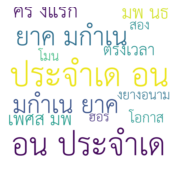

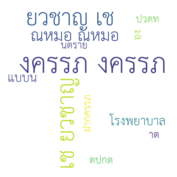

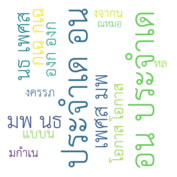

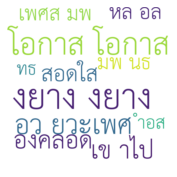

In [106]:
n_topics = 4
for topic_no in range(n_topics):
  display_topic(lda_model.show_topic(topic_no))

In [107]:
data_words = processed_docs
data_lemmatized = documents['headline_text']

In [108]:
print(data_lemmatized[:2])

0    ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...
1    รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...
Name: headline_text, dtype: object


In [109]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
# Run in terminal or command prompt
# python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = documents.dropna(subset=['headline_text'])

In [112]:
# Convert to list
data = df.headline_text.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [ ]:
data

In [ ]:
def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
  result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word and word not in list_words]
  # result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word]
  return " ".join(result)

def tokenize(d):
  result = d.split(" ")
  result = list(filter(None, result))
  return result

data_words = []
for txt in documents['headline_text']:
  data_words.append(cleanText(txt))

# vectorizer = CountVectorizer(tokenizer=tokenize)
# transformed_data = vectorizer.fit_transform(new_text)
# count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
# keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
# keyword_df2['word'] = vectorizer.get_feature_names()
# keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
# keyword_df2.sort_values(by=['count'], ascending=False).head(10)


In [ ]:
data_words

In [ ]:
vectorizer = CountVectorizer(analyzer='word', min_df=10, stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(data_words)

In [117]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

In [ ]:
# Define Search Param
search_params = {'n_components': [ 4,7,8,9, 10, 13, 15], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       iid=True, n_jobs=1,
       param_grid={'n_topics':  [ 4,7,8,9, 10, 13, 15], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'lack'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
df_document_topics.to_excel('styled.xlsx', engine='openpyxl')

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()
df_topic_keywords.to_csv("vector_text_LDA.csv")

In [124]:
df_topic_VECTOR = df_topic_keywords 

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [ ]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def silhouette(data, n):
  k=range(2,4)
  s = []
  for n_clusters in k:
    clusters = KMeans(n_clusters = n_clusters,init = 'k-means++')
    clusters.fit(data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    s.append(silhouette_score(data, labels, metric='euclidean'))
    print("Silhouette Coefficient for k == %s: %s" % (
     n_clusters, round(silhouette_score(data, clusters.labels_), 4 )))
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.plot(k,s,'b*-')
  ax.plot(k[np.argmax(s)], s[np.argmax(s)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
  plt.ylabel("Silouette Score")
  plt.xlabel("Number of clusters")
  plt.title("Silouette for KMeans clustering")
  plt.show()

print(df_topic_VECTOR )
silhouette(df_topic_VECTOR , 10)

In [ ]:
lda_output

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(lda_output)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(lda_output)
data_transformed = mms.transform(lda_output)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_transformed)
labels = kmeans.labels_
plot_clustering(data_transformed, labels)
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Para n_clusters = 2 O score_silhouette médio é : 0.3867882664717316
Para n_clusters = 3 O score_silhouette médio é : 0.4560404983374714
Para n_clusters = 4 O score_silhouette médio é : 0.49558966800004584
Para n_clusters = 5 O score_silhouette médio é : 0.4592257216073694
Para n_clusters = 6 O score_silhouette médio é : 0.44653861981712395
Para n_clusters = 7 O score_silhouette médio é : 0.4657501122921913
Para n_clusters = 8 O score_silhouette médio é : 0.48713968413247266


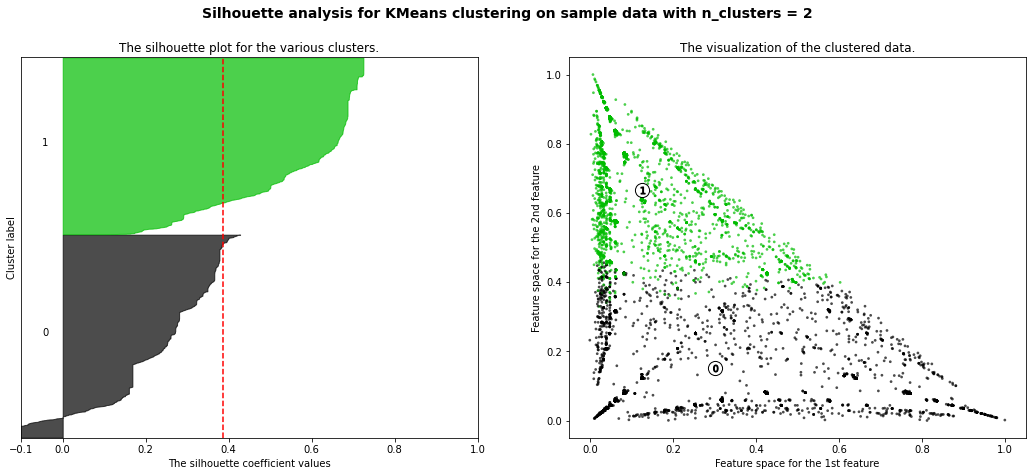

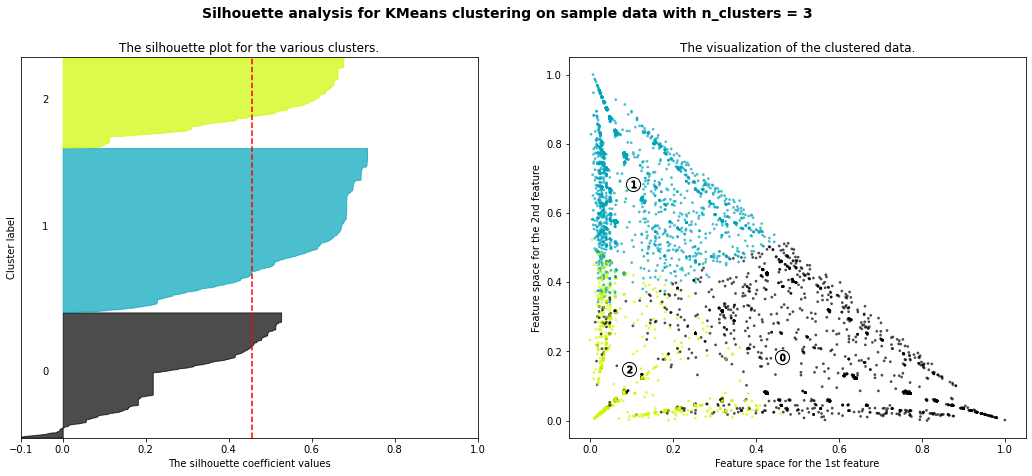

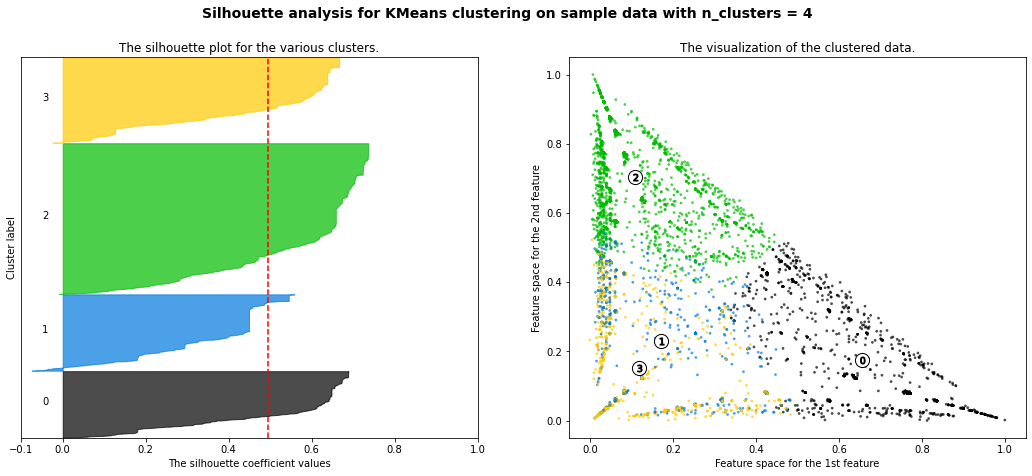

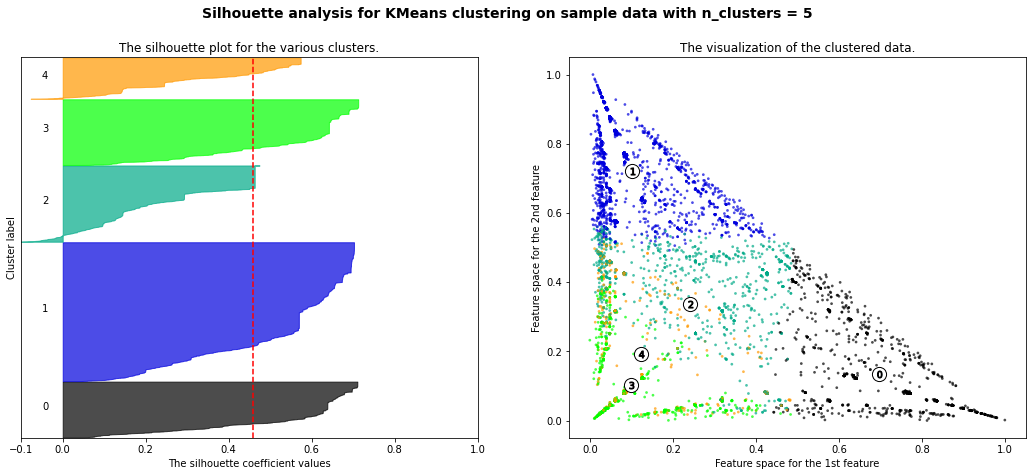

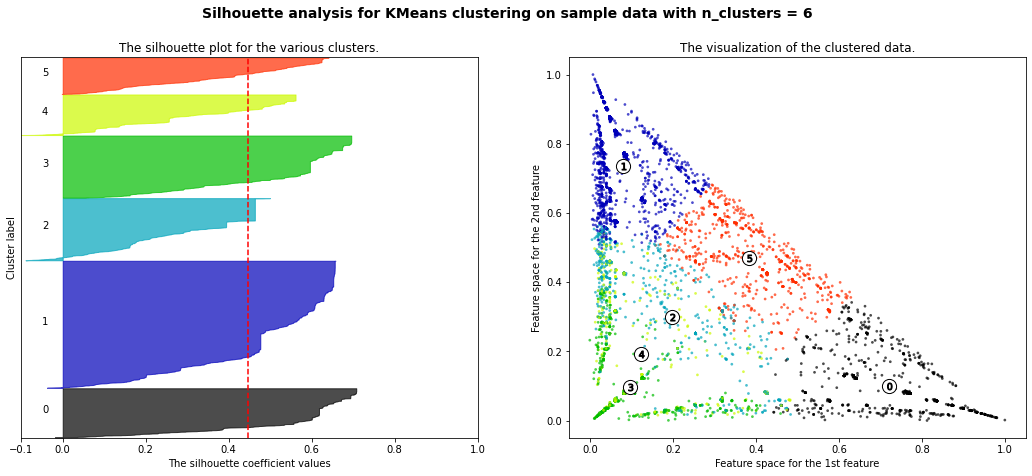

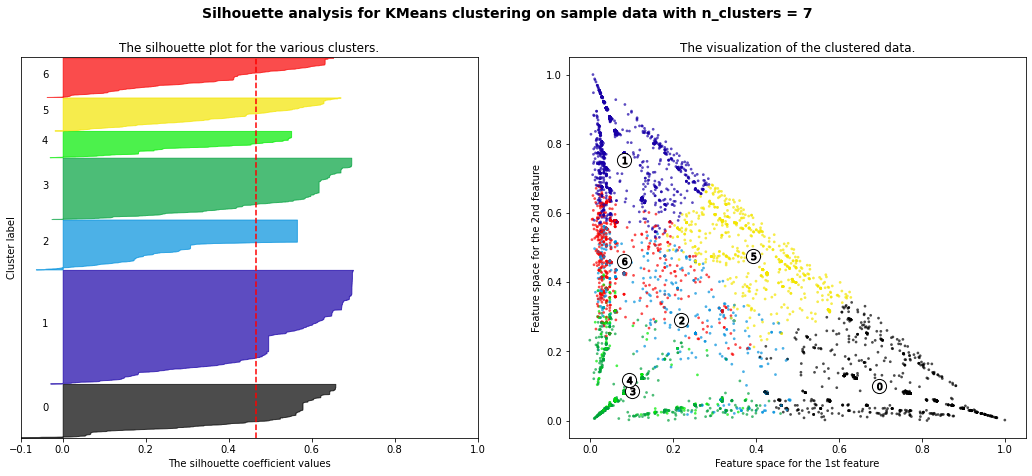

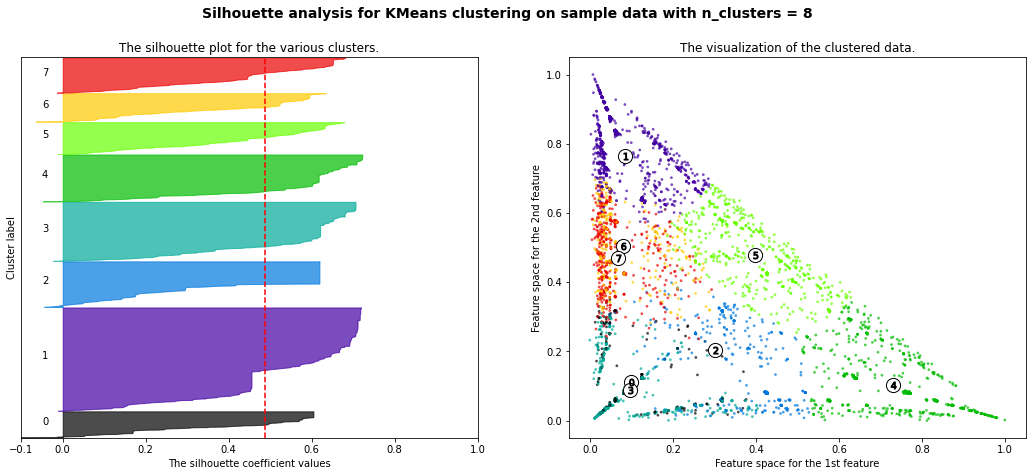

In [134]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()


In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))